This notebook illustrates the computation of a linear regression using PyTorch.

We will use the IRIS dataset, which provides width and height of iris flowers petals and sepals, as well as their species (Iris setosa, Iris virginica and Iris versicolor).

You can find more information about the IRIS dataset in:
- https://en.wikipedia.org/wiki/Iris_flower_data_set
- https://archive.ics.uci.edu/ml/datasets/iris


We will try to predict one of the data attributes



First, we need to install some python libraries that will be used. For that, we run `pip` through the %system magic (see https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-system)

In [1]:
!pip install matplotlib --quiet
!pip install scikit-learn --quiet
!pip install torch --quiet

Import all the modules we will need throughout the notebook.

In [2]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import random
import torch
import torch.nn as nn

We set the random seed to ensure reproducibility of our results (see https://pytorch.org/docs/stable/notes/randomness.html)


In [3]:
seed = 20
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(seed)
random.seed(seed)

Load the IRIS dataset. As X values, we use the sepal length (in cm). As Y values we use the petal width (in cm).

See the details of all the data fields in https://scikit-learn.org/stable/datasets/index.html#iris-dataset

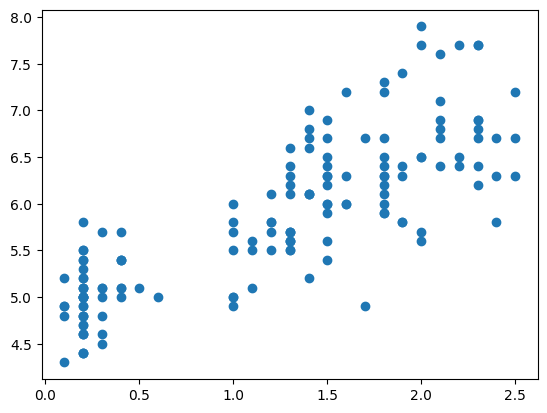

In [4]:
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([x[0] for x in iris.data])
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.show()

We create a model consisting of linear layer, that is a matrix multiplication plus a bias term.

In [5]:
model = nn.Linear(1, 1)

As we are facing a regression problem, an appropriate loss is the Mean Squared Error (MSE)

In [6]:
criterion = nn.MSELoss()

We will use vanilla Stochastic Gradient Descent (SGD) as optimization algorithm.

In [7]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) 

Now we perform the training iterations. At each iteration we train with all our data.

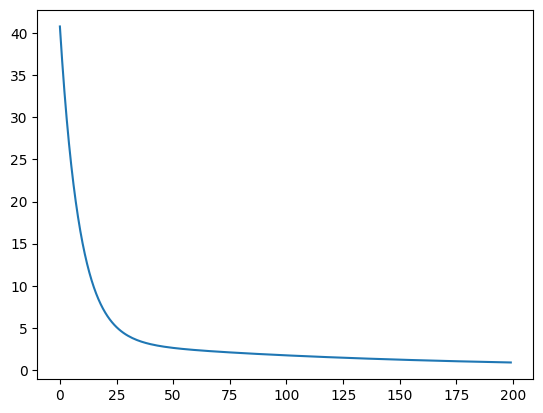

In [8]:
losses = []
num_epochs = 200

# Inputs and expected outputs are constant across iterations...
inputs = torch.Tensor(x_vals).unsqueeze(1)
expected_outputs = torch.Tensor(y_vals).unsqueeze(1)
# ...we used unsqueeze to add an extra dimension so that the first
# dimension is the element within the batch and the second dimention
# is the data dimensionality, which is 1.

for epoch in range(1, num_epochs + 1):  
  # The variable gradients need to be set to zero before anything .
  optimizer.zero_grad()
  
  # Compute the forward pass and the loss.
  model_outputs = model(inputs)
  loss = criterion(model_outputs, expected_outputs)
  
  # Backward pass: compute the gradients of the parameters
  # with respect to the loss.
  loss.backward()
  
  # Perform the optimization step, upgrading the parameters accoding
  # to their gradients computed before.
  optimizer.step()
  
  # with .item() we take the value of the single-element loss tensor
  # (see https://pytorch.org/docs/stable/tensors.html#torch.Tensor.item)
  loss_value = loss.item()
  
  # Record the value of the loss across iterations
  losses.append(loss_value)

# Plot the evolution of the loss
plt.plot(losses)
plt.show()

Let's visualize the line we got after the training...

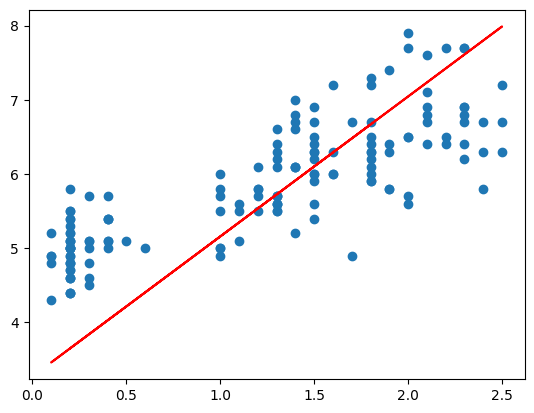

In [9]:
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, model_outputs.detach().numpy(), 'r-', label='Best fit line')
plt.show()